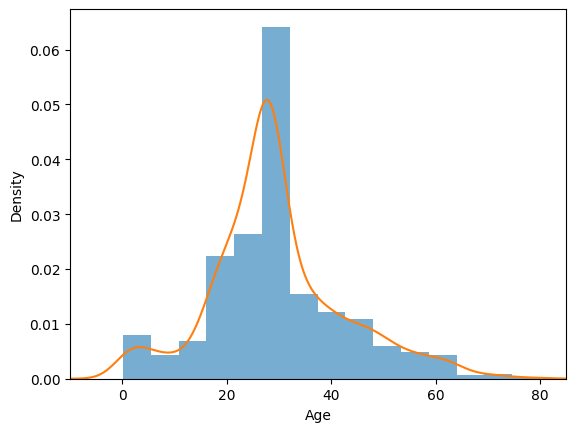

Mean of "Age":   29.50
Median of "Age": 28.00
Percent missing in "Cabin": 77.46%


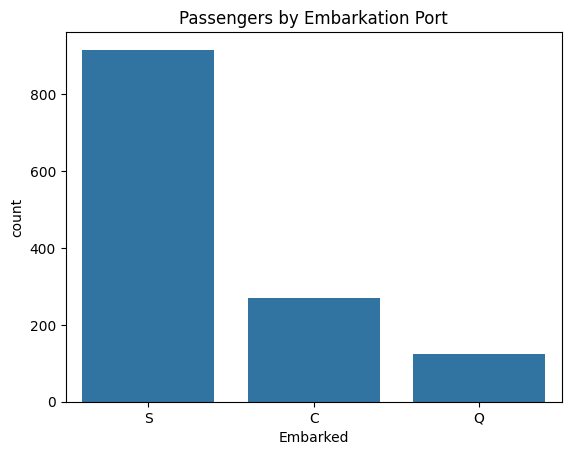

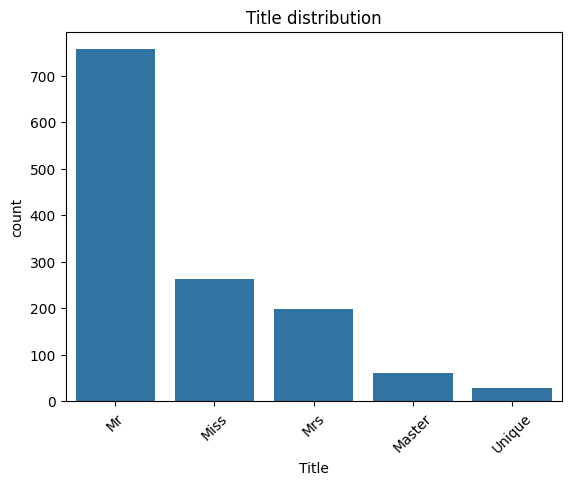

Lagret: Titanic_Cleaned.csv


In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/DAVE3625/Dave3625-Host-2025/main/Lab3/data/Titanic.csv"
df = pd.read_csv(url)

df.head()  # bare for å se at data kom inn

# Fyll inn manglende verdier som påvirker statistikk og etterfølgende steg
df["Age"]  = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Rask sjekk: fordeling av alder
ax = df["Age"].hist(bins=15, density=True, alpha=0.6)
df["Age"].plot(kind="density")
ax.set(xlabel="Age")
plt.xlim(-10, 85)
plt.show()

print(f'Mean of "Age":   {df["Age"].mean():.2f}')
print(f'Median of "Age": {df["Age"].median():.2f}')

# Sjekk hvor mye Cabin som mangler, og lag en enkel indikatorvariabel
pct_missing_cabin = (df["Cabin"].isna().mean() * 100)
print(f'Percent missing in "Cabin": {pct_missing_cabin:.2f}%')
df["HasCabin"] = df["Cabin"].notna()

# Fyll inn Embarked (oppgaven bruker ofte "S" som standard)
df["Embarked"] = df["Embarked"].fillna("S")

sns.countplot(x="Embarked", data=df)
plt.title("Passengers by Embarkation Port")
plt.show()

# Ekstraher tittel fra Name (bruk rå regex-streng r'...' for å unngå escape-advarsel)
df["Title"] = df["Name"].str.extract(r' ([A-Z][a-z]+)\.')[0]

# Slå sammen noen varianter
df["Title"] = df["Title"].replace({"Mlle": "Miss", "Mme": "Mrs", "Ms": "Miss"})

# Samle sjeldne titler i "Unique"
rare_titles = ['Don','Dona','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer']
df["Title"] = df["Title"].replace(rare_titles, "Unique")

# Se fordeling
sns.countplot(x="Title", data=df, order=df["Title"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Title distribution")
plt.show()

# Diskretiser (qcut deler i like store *kvantiler*). duplicates='drop' gjør koden robust hvis det blir like grenser.
df["CatAge"]  = pd.qcut(df["Age"],  q=4, labels=False, duplicates="drop")
df["CatFare"] = pd.qcut(df["Fare"], q=4, labels=False, duplicates="drop")

# Slipp kolonner vi ikke vil ta med videre
df_model = df.drop(columns=["PassengerId", "Age", "Fare", "Cabin", "Name", "Ticket"])

# One-hot encoding for kategoriske variabler (drop_first=True for å unngå dummy-fellen)
df_dum = pd.get_dummies(df_model, drop_first=True)

df_dum.head()

# Lagre resultatet 
df_dum.to_csv("Titanic_Cleaned.csv", index=False)
print("Lagret: Titanic_Cleaned.csv")





